In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import folium

In [3]:
data_path='./data'
sns.set(rc={'figure.figsize':(20,6)})

In [4]:
df=pd.read_csv(os.path.join(data_path,'cleaned_data.csv'))
df.head(2)

,event_id,event_date,year,event_type,sub_event_type,actor1,actor2,inter2,civilian_targeting,region,district,location,latitude,longitude,source,fatalities,population
0,156190,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Kherson,Khersonskyi,Antonivka,46.6799,32.6925,Unian,0,11352.0
1,156193,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Zaporizhia,Polohivskyi,Bilohiria,47.5268,36.0004,Ministry of Defence of Ukraine,0,282.0


In [5]:
print(df['sub_event_type'].unique())
counts = df['sub_event_type'].value_counts()
print(counts)

['Shelling/artillery/missile attack' 'Air/drone strike'
 'Remote explosive/landmine/IED' 'Abduction/forced disappearance' 'Attack'
 'Grenade' 'Sexual violence' 'Suicide bomb' 'Mob violence'
 'Violent demonstration']
sub_event_type
Shelling/artillery/missile attack    63913
Air/drone strike                     11235
Remote explosive/landmine/IED         1258
Attack                                 519
Abduction/forced disappearance         379
Sexual violence                         80
Grenade                                 10
Mob violence                             3
Suicide bomb                             2
Violent demonstration                    1
Name: count, dtype: int64


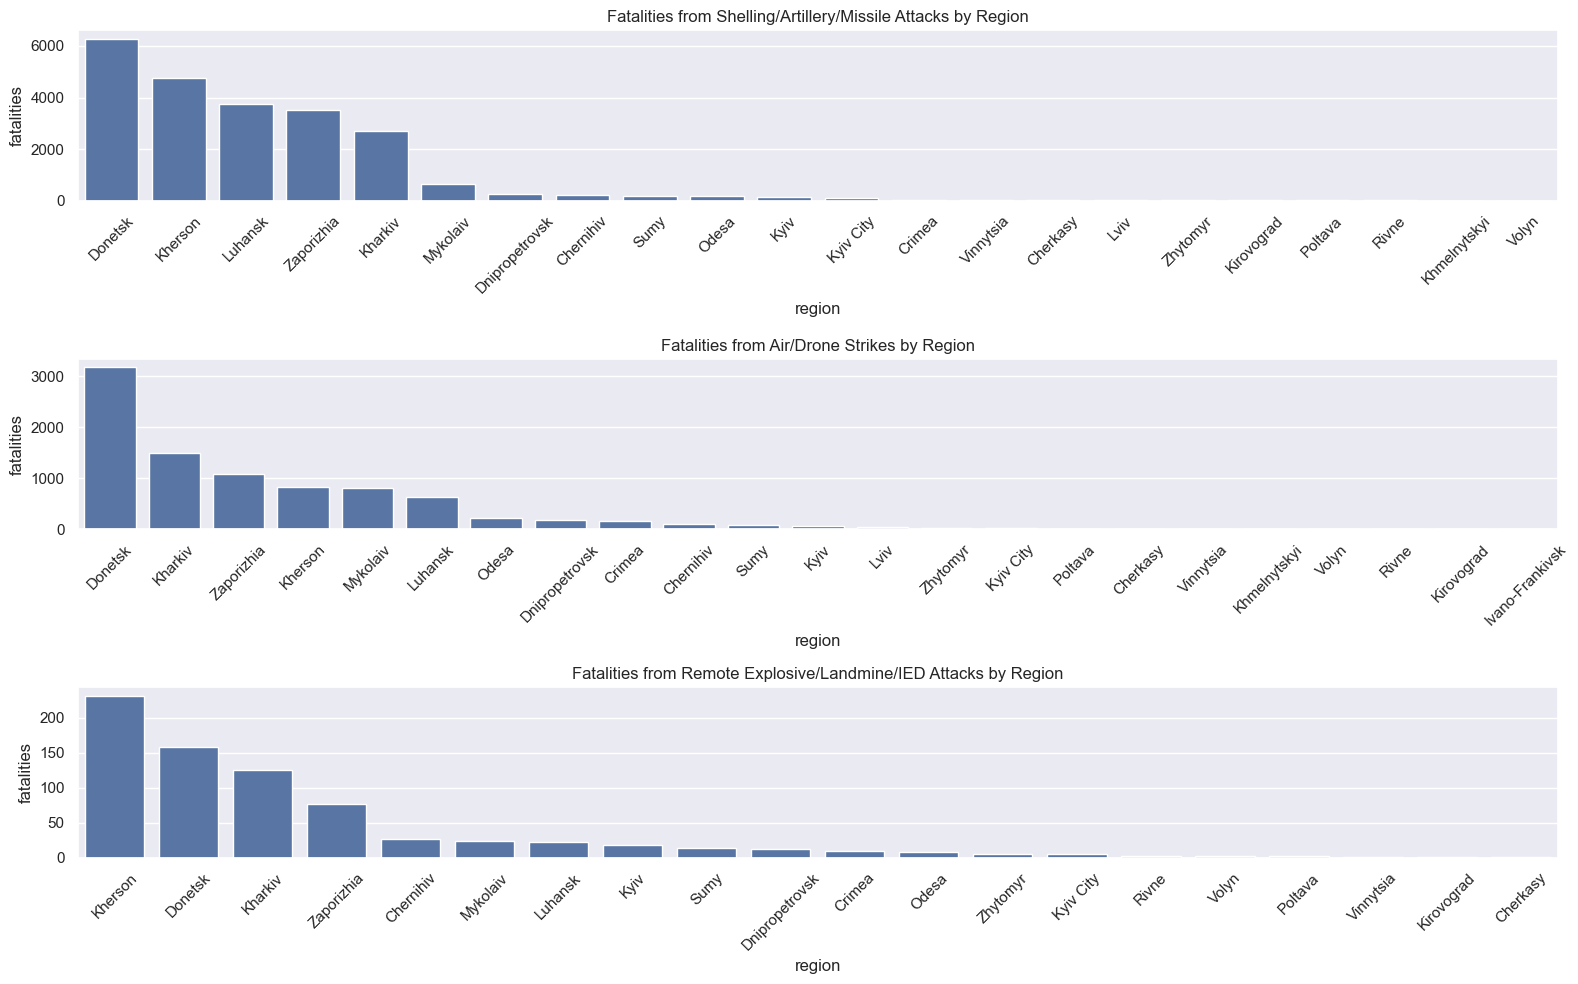

In [6]:
# Фільтруємо дані за певними видами подій
shelling_data = df[df['sub_event_type'] == 'Shelling/artillery/missile attack']
air_strike_data = df[df['sub_event_type'] == 'Air/drone strike']
explosive_data = df[df['sub_event_type'] == 'Remote explosive/landmine/IED']

# Групуємо дані за регіоном і підраховуємо загальну кількість смертей для кожного регіону
shelling_fatalities = shelling_data.groupby('region')['fatalities'].sum().reset_index()
air_strike_fatalities = air_strike_data.groupby('region')['fatalities'].sum().reset_index()
explosive_fatalities = explosive_data.groupby('region')['fatalities'].sum().reset_index()

# Фільтруємо регіони з fatalities, які не дорівнюють 0
shelling_fatalities = shelling_fatalities[shelling_fatalities['fatalities'] > 0]
air_strike_fatalities = air_strike_fatalities[air_strike_fatalities['fatalities'] > 0]
explosive_fatalities = explosive_fatalities[explosive_fatalities['fatalities'] > 0]

# Сортуємо дані за кількістю смертей у спадаючому порядку
shelling_fatalities = shelling_fatalities.sort_values(by='fatalities', ascending=False)
air_strike_fatalities = air_strike_fatalities.sort_values(by='fatalities', ascending=False)
explosive_fatalities = explosive_fatalities.sort_values(by='fatalities', ascending=False)

# Побудова графіків
plt.figure(figsize=(16, 10))
plt.subplot(3, 1, 1)
sns.barplot(x='region', y='fatalities', data=shelling_fatalities)
plt.title('Fatalities from Shelling/Artillery/Missile Attacks by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x='region', y='fatalities', data=air_strike_fatalities)
plt.title('Fatalities from Air/Drone Strikes by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x='region', y='fatalities', data=explosive_fatalities)
plt.title('Fatalities from Remote Explosive/Landmine/IED Attacks by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



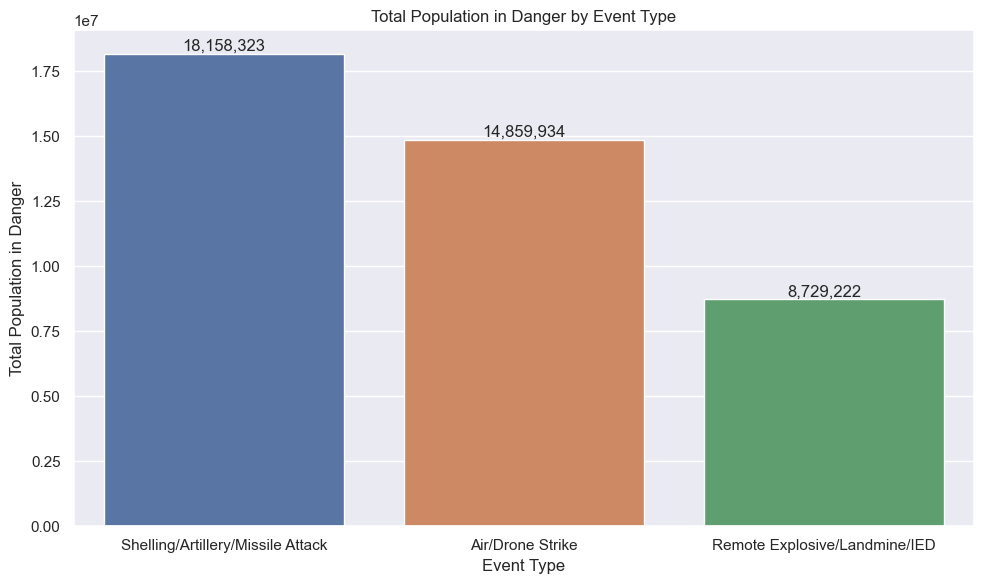

In [7]:

# Видаляємо дублікати для кожного типу подій
shelling_data_unique = shelling_data.drop_duplicates(subset=['location'])
air_strike_data_unique = air_strike_data.drop_duplicates(subset=['location'])
explosive_data_unique = explosive_data.drop_duplicates(subset=['location'])

# Обчислюємо сумарну кількість населення для кожного типу подій
shelling_population_sum = shelling_data_unique['population'].sum()
air_strike_population_sum = air_strike_data_unique['population'].sum()
explosive_population_sum = explosive_data_unique['population'].sum()

# Створюємо датафрейм для зручності побудови графіку
summary_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Population in Danger': [shelling_population_sum, air_strike_population_sum, explosive_population_sum]
})

# Побудова барчатого графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Population in Danger', data=summary_data, hue='Event Type', dodge=False, legend=False)

# Додавання текстових міток над кожним стовпчиком
for index, row in summary_data.iterrows():
    plt.text(index, row['Population in Danger'], f"{int(row['Population in Danger']):,}", ha='center', va='bottom')

plt.title('Total Population in Danger by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Population in Danger')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

